                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.853261   0.900000  0.841121  0.869565  0.924141
Random Forest        0.875000   0.896226  0.887850  0.892019  0.935186


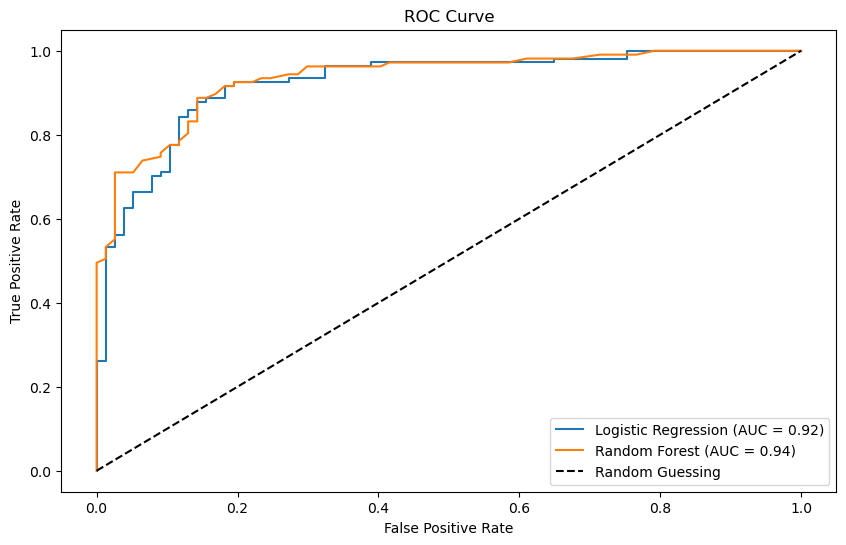

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('heart_disease_data.csv')

# Define feature columns and target column
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Identify categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Create a ColumnTransformer to handle the preprocessing of different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical variables
    ]
)

# Logistic Regression model pipeline
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Random Forest model pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train Logistic Regression model
log_reg_pipeline.fit(X_train, y_train)
y_pred_log_reg = log_reg_pipeline.predict(X_test)

# 2. Train Random Forest model
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate both models using accuracy, precision, recall, F1-score, and ROC-AUC

# Logistic Regression metrics
log_reg_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1 Score': f1_score(y_test, y_pred_log_reg),
    'ROC AUC': roc_auc_score(y_test, log_reg_pipeline.predict_proba(X_test)[:, 1])
}

# Random Forest metrics
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
}

# Display the results in a DataFrame for comparison
metrics_df = pd.DataFrame([log_reg_metrics, rf_metrics], index=['Logistic Regression', 'Random Forest'])
print(metrics_df)

# Plotting ROC Curve for both models
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_pipeline.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pipeline.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(log_reg_metrics['ROC AUC']))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_metrics['ROC AUC']))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
